# 1 Import Packages

In [12]:
import xarray as xr
import os, sys
from cdo import Cdo
from pathlib import Path
import matplotlib.pyplot as plt

import cartopy.crs as ccrs

ModuleNotFoundError: No module named 'cartopy'

In [8]:
cdo = Cdo()

# 2 Metadata

In [4]:
sys.path.append(os.path.abspath(Path().resolve().parents[1]))
import config

In [5]:
import importlib
importlib.reload(config)

<module 'config' from '/work/uo1075/u301101/Doktorarbeit/CNN/config.py'>

In [9]:
basin_file = config.basin_file

# 3 Processing

## 3.1 Interpolate Grid

In [56]:
grid_description = "r360x180"

In [57]:
path = os.path.join(config.data_pro_path, "basin", grid_description)
filename = "_".join(["basin", grid_description])+".nc"

os.makedirs(path, exist_ok = True)
out_file = os.path.join(path, filename)

cdo.remapbil("r360x180", input = basin_file, output=out_file)

'/work/uo1075/u301101/Doktorarbeit/CNN/data/processed/basin/r360x180/basin_r360x180.nc'

## 3.2 Define Atlantic Mask

In [60]:
basin_interp = xr.load_dataset(out_file).squeeze()
atlantic_basin_mask = basin_interp["basin"]==2

atlantic_basin_mask_filename = "_".join(["mask_atlantic", grid_description])+".nc"
atlantic_basin_mask.to_netcdf(os.path.join(path, atlantic_basin_mask_filename))

/work/uo1075/u301101/programming/miniconda3/envs/CNN/lib/python3.8/site-packages/xarray/coding/times.py:150: SerializationWarning: Ambiguous reference date string: 0-01-01 22:40:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0000-01-01 22:40:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


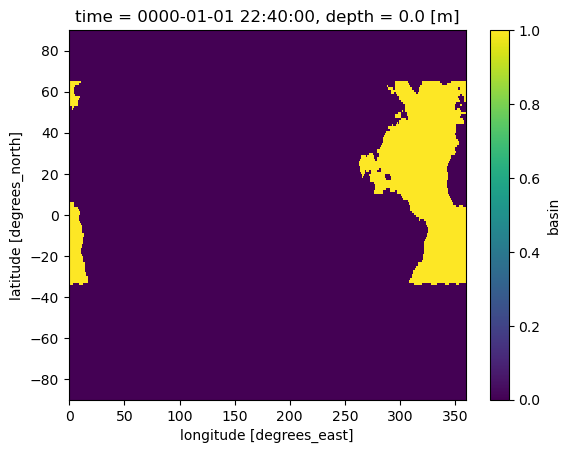

In [61]:
(atlantic_basin_mask).plot.pcolormesh()